In [720]:
# import warning for skip warning menssages
import warnings
# import Sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX
# import for manipulate datetime
from datetime import datetime
# library for math operations and others 
import numpy as np
#Import the required modules for plot creation
import matplotlib.pyplot as plt
# Import pandas dataset
import pandas as pd
# import for search parameters of Sarimax
import pmdarima as pm
#import the required modules for TimeSeries data generation
import statsmodels.api as sm
# import adfuller test
from statsmodels.tsa.stattools import adfuller
# import for customize plots
from pylab import rcParams
# apply skip warning menssages
warnings.filterwarnings("ignore")
# Style of plots
plt.style.use('fivethirtyeight')

In [721]:
#import and create date
df= pd.read_csv('datos_de_prueba.csv', sep=';',decimal=',')
data = pd.DataFrame(df, columns= ['Fecha','Venta'])
data['Fecha']= pd.to_datetime(df['Fecha']) 
data.set_index('Fecha', inplace=True)
data = data.rename_axis(index=None, columns=None)
data =  (data[data.index <= '31-08-2019 '])
#divide train and test set
y_train = (data[data.index < '2019-07-01 '])
y_test = (data[data.index >= '2019-07-01 '  ])
demand= pd.read_csv('Fits_Test_Eduards_demand_dss.csv', sep=';',decimal='.')

In [722]:
demand

,IdCombinacion,Fecha,Venta,Fit
0,B95750CC-6F89-45A8-A02C-1A26E5041564,01-07-2019,1,0.679
1,B95750CC-6F89-45A8-A02C-1A26E5041564,02-07-2019,0,0.679
2,B95750CC-6F89-45A8-A02C-1A26E5041564,03-07-2019,2,0.679
3,B95750CC-6F89-45A8-A02C-1A26E5041564,04-07-2019,0,0.679
4,B95750CC-6F89-45A8-A02C-1A26E5041564,05-07-2019,0,0.679
5,B95750CC-6F89-45A8-A02C-1A26E5041564,06-07-2019,0,0.000
6,B95750CC-6F89-45A8-A02C-1A26E5041564,08-07-2019,0,0.725
7,B95750CC-6F89-45A8-A02C-1A26E5041564,09-07-2019,2,0.747
8,B95750CC-6F89-45A8-A02C-1A26E5041564,10-07-2019,5,0.770
9,B95750CC-6F89-45A8-A02C-1A26E5041564,11-07-2019,0,0.793


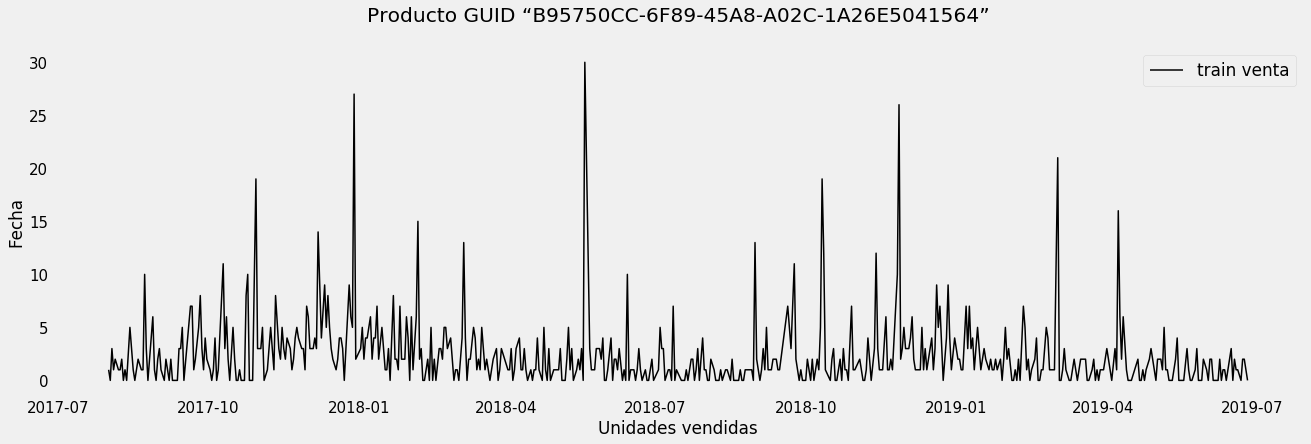

In [564]:
#plot y_train data
plt.plot(y_train, color ="black", label='train venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564”')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,6),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

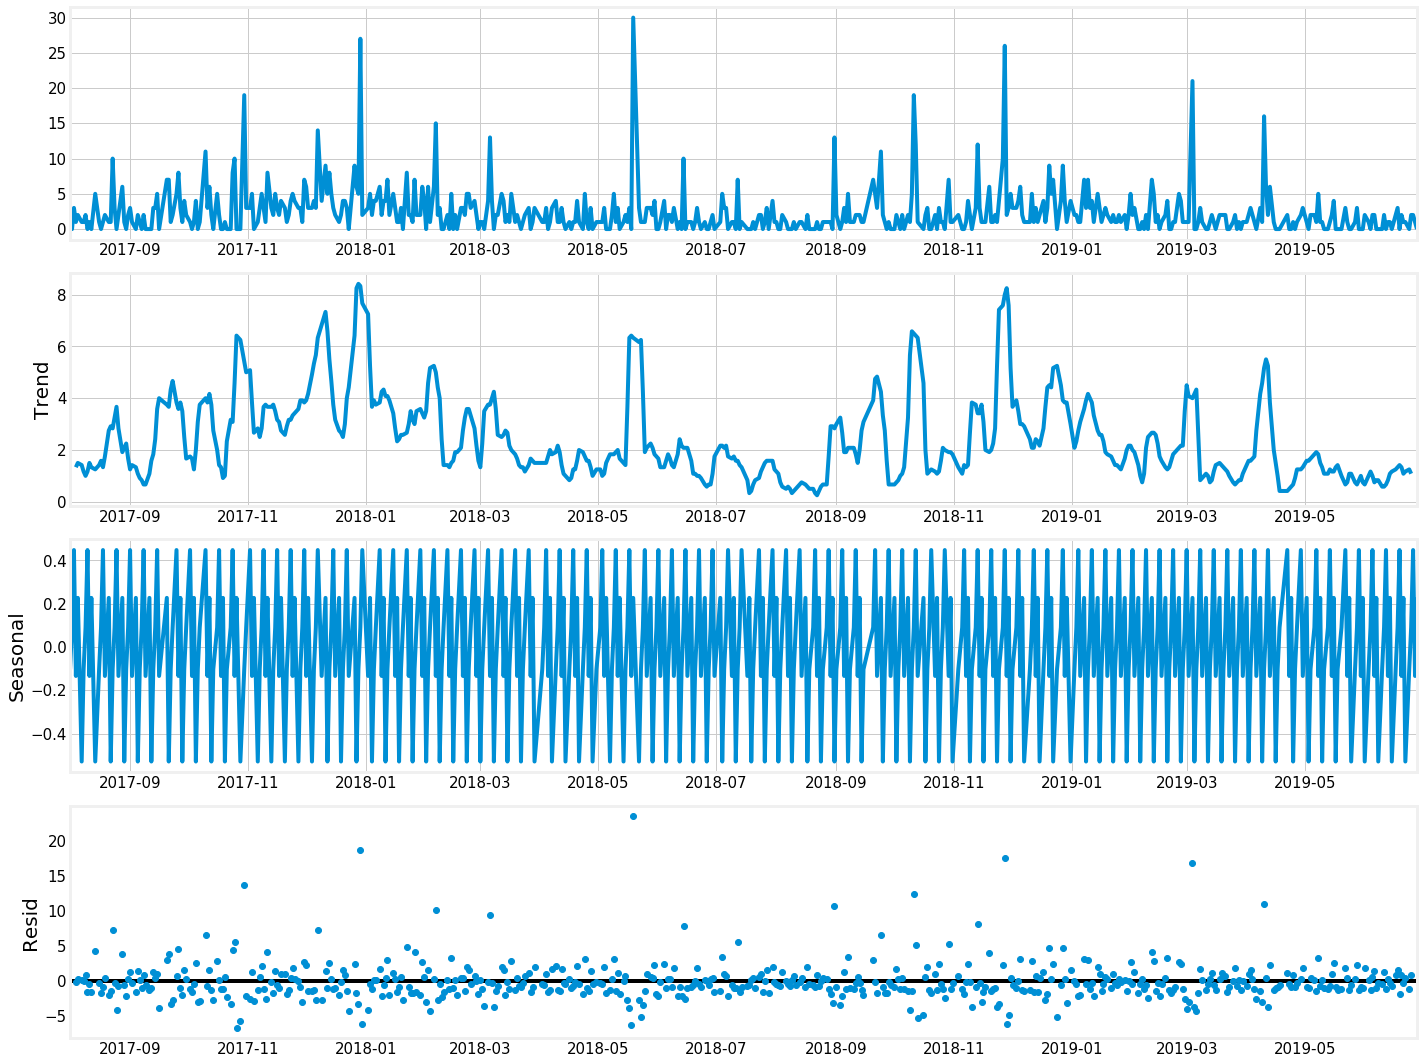

In [565]:
# plot y_train data decompose
rcParams['figure.figsize'] = 20, 15
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive',freq=6)
fig = decomposition.plot()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.facecolor"] ='white'
plt.grid(False)
plt.rc('font', size=15) 
plt.rc('xtick', labelsize=15)
plt.show()

In [566]:
#fuction for obtain statistics informations
def tsdiag(y, figsize = (14,8), title = "", lags = 10):
    #The data:
    tmp_data = pd.Series(y)
    #The Ljung-Box test results for the first k lags:
    tmp_acor = list(sm_stat.diagnostic.acorr_ljungbox(tmp_data, lags = lags, boxpierce = True))
    # get the p-values
    p_vals = pd.Series(tmp_acor[1])
    #Start the index from 1 instead of 0 (because Ljung-Box test is for lag values from 1 to k)
    p_vals.index += 1
    fig = plt.figure(figsize = figsize)
    #Plot the p-values:
    p_vals.plot(ax = fig.add_subplot(313), linestyle='', marker='o', title = "p-values for Ljung-Box statistic", legend = False)
    #Add the horizontal 0.05 critical value line
    plt.axhline(y = 0.05, color = 'blue', linestyle='--')
    # Annotate the p-value points above and to the left of the vertex
    x = np.arange(p_vals.size) + 1
    for X, Y, Z in zip(x, p_vals, p_vals):
        plt.annotate(round(Z, 4), xy=(X,Y), xytext=(-5, 5), ha = 'left', textcoords='offset points')
    plt.show()
    # Return the statistics:
    col_index = ["Ljung-Box: X-squared", "Ljung-Box: p-value", "Box-Pierce: X-squared", "Box-Pierce: p-value"]
    return pd.DataFrame(tmp_acor, index = col_index, columns = range(1, len(tmp_acor[0]) + 1))

In [567]:
#fuction for plot statistics informations
def tsdisplay(y, figsize = (14, 8), title = "", lags = 20):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)
    #Plot the ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(323),  linewidth=1.1)
    plt.grid(False)
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(324), linewidth=1.1)
    plt.grid(False)
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the QQ plot of the data:
    sm.qqplot(tmp_data, line='s', ax = fig.add_subplot(325), linewidth=0.5) 
    plt.title("QQ Plot")
    plt.grid(False)
    #Plot the residual histogram:
    fig.add_subplot(326).hist(tmp_data, bins = 40, normed = 1, linewidth=0.5, color='black')
    plt.title("Histograma")
    #Fix the layout of the plots:
    plt.tight_layout()
    plt.grid(False)
    plt.show()

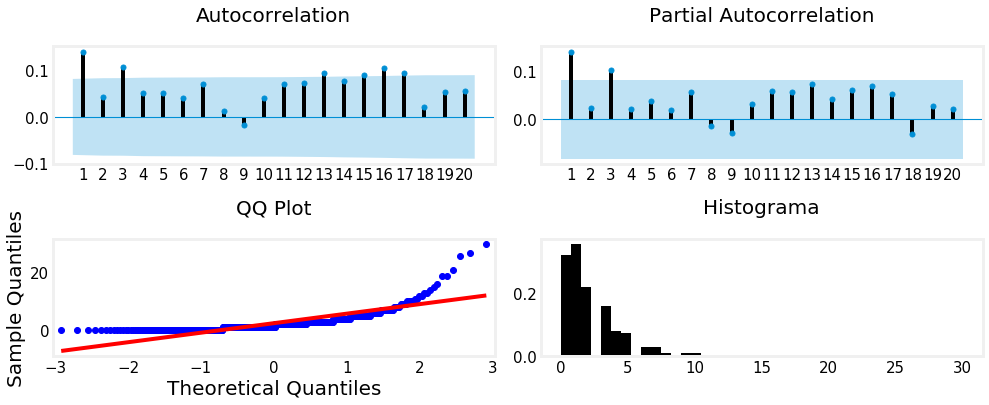

In [569]:
#display information
tsdisplay(y_train.Venta)

In [570]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 6, center = False).mean()
    rol_std = ts.rolling(window = 6, center = False).std()
    plt.plot(ts, color = 'blue',label = 'Data',linewidth=0.8)
    plt.plot(rol_mean, color = 'red', label = 'Media Movil',linewidth=2)
    plt.plot(rol_std, color ='black', label = 'Desviación Estandar Movil',linewidth=2)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Fecha', fontsize = 15)
    plt.ylabel('Venta', fontsize = 15)
    plt.legend(loc='best', fontsize = 15)
    plt.title('Media Movil y Desviación Estandar Movil de la Data', fontsize = 15)
    plt.show(block= True)

In [571]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [572]:
#Adfuller test 
TestStationaryAdfuller(y_train)

Test Statistic                -1.152732e+01
p-value                        3.907460e-21
#Lags Used                     2.000000e+00
Number of Observations Used    5.660000e+02
Critical Value (1%)           -3.441956e+00
Critical Value (5%)           -2.866660e+00
Critical Value (10%)          -2.569497e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [573]:
# Create model for SARIMAX(p,d,q)(P,D,Q)6
def arimamodel(timeserie):
    autoarima_model = pm.auto_arima(y_train, start_p=1, start_q=1,
                             max_p=5, max_q=5, m=6,
                             start_P=2, seasonal=True,
                             d=0, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
    return autoarima_model

In [574]:
# run searching of parameters
arima_model = arimamodel(y_train)
# summary charasteristics of model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(2,1,1)[6] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=3322.559, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=3150.781, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=3320.560, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=3320.683, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[6] intercept   : AIC=3098.482, Time=0.51 sec
 ARIMA(1,0,0)(2,1,1)[6] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(1,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(2,1,0)[6] intercept   : AIC=3098.890, Time=0.46 sec
 ARIMA(2,0,0)(2,1,0)[6] intercept   : AIC=3100.016, Time=0.63 sec
 ARIMA(1,0,1)(2,1,0)[6] intercept   : AIC=inf, Time=2.53 sec
 ARIMA(0,0,1)(2,1,0)[6] intercept   : AIC=3098.330, Time=0.48 sec
 ARIMA(0,0,1)(1,1,0)[6] intercept   : AIC=3150.692, Time=0.27 sec
 ARIMA(0,0,1)(2,1,1)[6] intercept   : AIC=inf, Time=1.91 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  569
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 6)   Log Likelihood               -1544.165
Date:                            Sun, 23 Aug 2020   AIC                           3096.331
Time:                                    04:15:39   BIC                           3113.664
Sample:                                         0   HQIC                          3103.097
                                            - 569                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0697      0.042      1.651      0.099      -0.013       0.152
ar.S.L6       -0.6673      0.025    -26.725      0.000      -0.716      -0.618
ar.S.L12      -0.3008      0.022    -13.437      0.000      -0.345      -0.257
sigma2        14.0456      0.306     45.951      0.000      13.447      14.645
===================================================================================
Ljung-Box (Q):                      117.59   Jarque-Bera (JB):              4531.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             2.29
Prob(H) (two-sided):                  0.02   Kurtosis:                        16.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

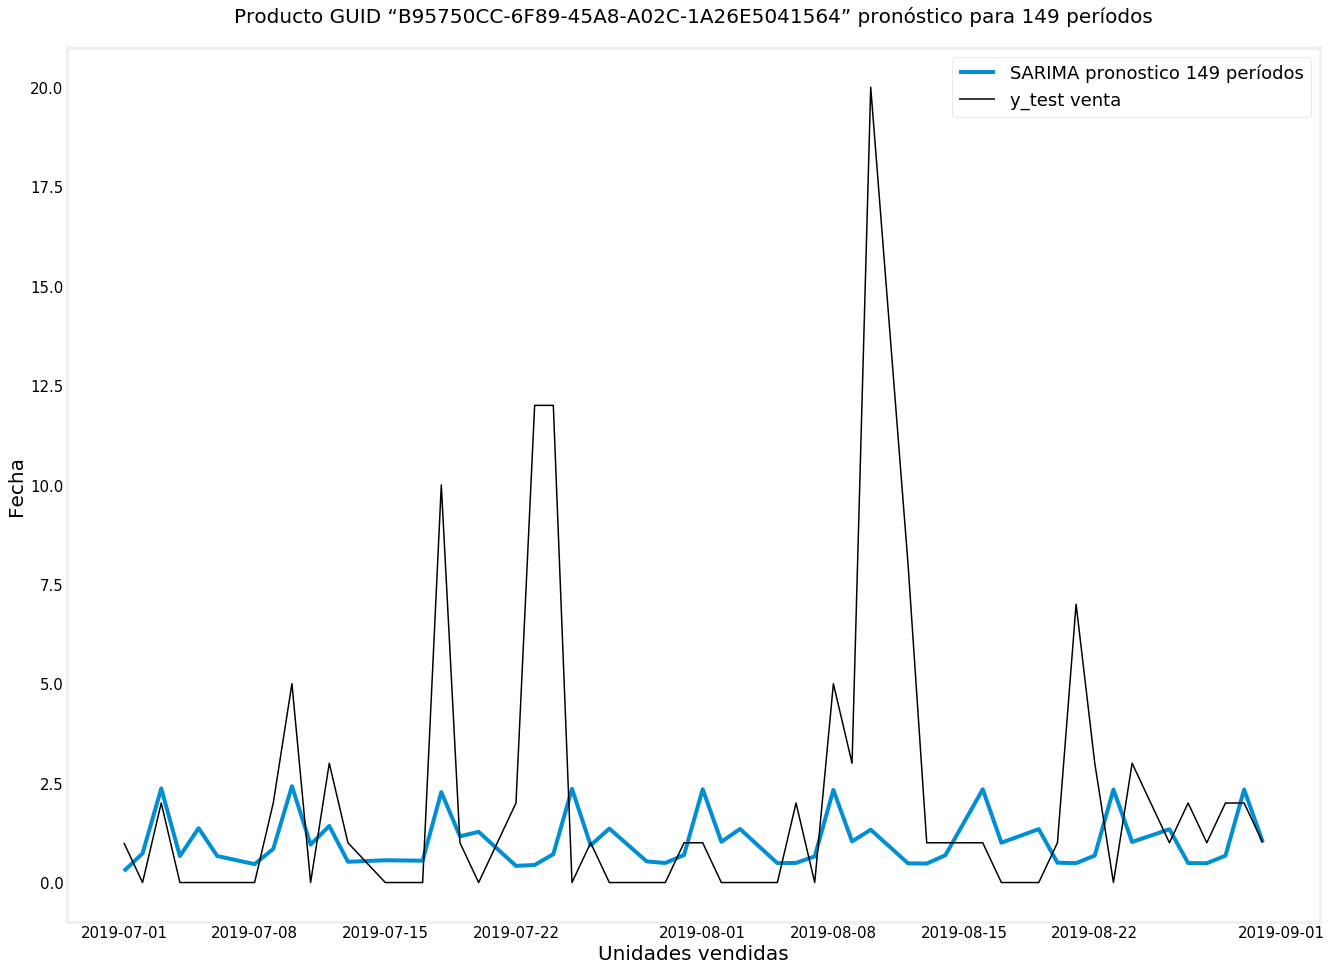

In [580]:
test_array = pd.DataFrame(y_test, columns= ['Venta'])
#with the marameters selected run SARIMAX with y_train data
model=SARIMAX(y_train, order=arima_model.order, seasonal_order=arima_model.seasonal_order)
#fit the model
results = model.fit()
#make predictions
arima_pred = results.get_forecast(len(y_test))
arima_mean = arima_pred.predicted_mean
test_array['pred'] = arima_mean.values.tolist()
#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot( test_array.pred, label='SARIMA pronostico 149 períodos' ,linewidth=4.0)
plt.plot(test_array.Venta, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

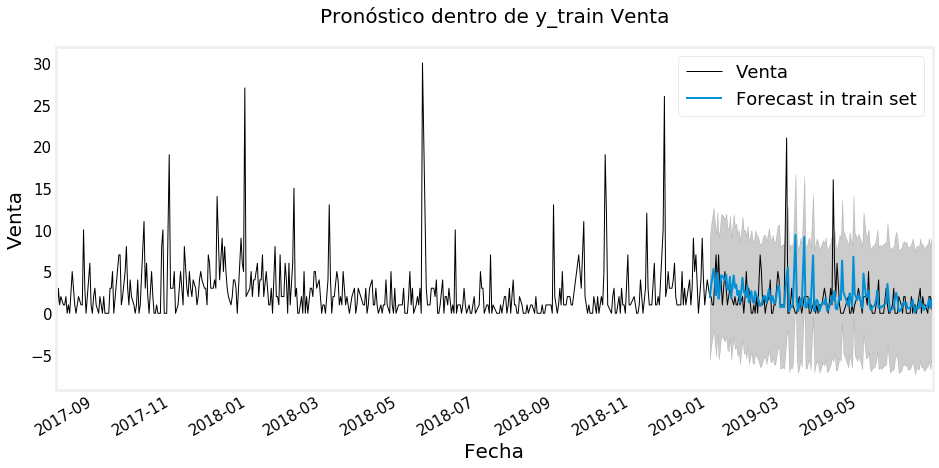

In [581]:
#prediction into y_train
pred = results.get_prediction(start=('2019-01-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_train.plot(label='y_train venta',linewidth=1.0,color ="black")
pred.predicted_mean.plot(ax=ax, label='Forecast in train set', alpha=5, figsize=(14, 7),linewidth=2.0)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Venta')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
size=20
plt.title('Pronóstico dentro de y_train Venta')
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show()

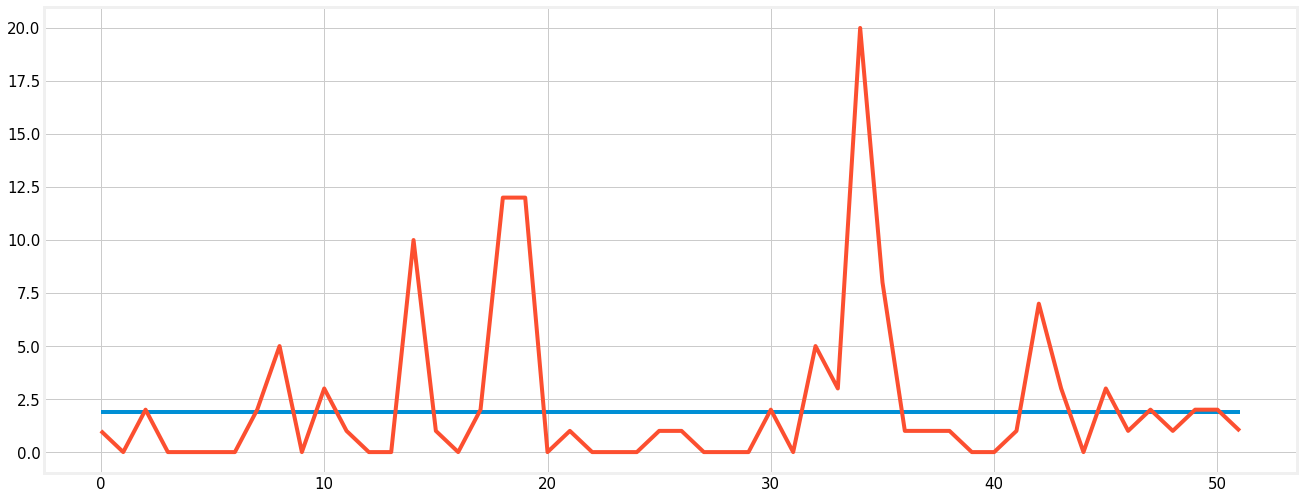

In [582]:
#forecasting Croston y_test
import numpy as np
import random
from croston import croston
import matplotlib.pyplot as plt

fit_pred = croston.fit_croston(y_train, len(y_test),'original')
fit_pred1 = croston.fit_croston(y_train, len(y_test), 'sba') # Syntetos-Boylan approximation
fit_pred2 = croston.fit_croston(y_train, len(y_test), 'sbj') # Shale-Boylan-Johnston
plt.plot(fit_pred2['croston_forecast'])
plt.plot(y_test.values)

In [519]:
df1=pd.DataFrame({"Date" : y_train.index, "Count" : y_train.Venta})
df1.reset_index(inplace=True)
df1=df1.drop('index', 1)

In [520]:
df1.transpose()


,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
Date,2017-08-01 00:00:00,2017-08-02 00:00:00,2017-08-03 00:00:00,2017-08-04 00:00:00,2017-08-05 00:00:00,2017-08-07 00:00:00,2017-08-08 00:00:00,2017-08-09 00:00:00,2017-08-10 00:00:00,2017-08-11 00:00:00,...,2019-06-18 00:00:00,2019-06-19 00:00:00,2019-06-20 00:00:00,2019-06-21 00:00:00,2019-06-22 00:00:00,2019-06-24 00:00:00,2019-06-25 00:00:00,2019-06-26 00:00:00,2019-06-27 00:00:00,2019-06-28 00:00:00
Count,1,0,3,1,2,1,1,2,0,1,...,3,0,2,1,1,0,2,2,1,0


In [521]:
#  q is often called the “demand” and a the “inter-arrival time”.
q = df1[abs(df1['Count']) > 0.0]['Count']
demand_times = pd.Series(list(q.index)) + 1
a = demand_times - demand_times.shift(1).fillna(0.0)
df2 = pd.DataFrame({'demand_time' : list(demand_times), 'q' : list(q) , 'a' : list(a) })

In [522]:
def get_coeff(alpha , croston_type):
    if(croston_type == "sba"):
        return 1.0-(alpha/2.0)
    elif(croston_type == "sbj"):
        return (1.0 - alpha/(2.0-alpha))
    # default 
    return 1.0

In [523]:
# q  and a forecast
alpha = 0.1

df2['q_est'] = None
df2['a_est'] = None

df2.loc[0 , 'q_est'] = df2['q'][0]
df2.loc[0,  'a_est'] = df2['a'][0]
for i in range(df2.shape[0] - 1):
    q1 = (1.0 - alpha) * df2['q_est'][ i ] + alpha * df2['q'][ i ]
    a1 = (1.0 - alpha) * df2['a_est'][ i ] + alpha * df2['a'][ i ]
    df2.loc[i + 1, 'q_est'] = q1
    df2.loc[i + 1, 'a_est'] = a1

In [524]:
coeff = get_coeff(alpha , "default")
df2['forecast'] = coeff * df2['q_est'] / df2['a_est']
df2

,demand_time,q,a,q_est,a_est,forecast
0,1,1.0,1.0,1,1,1
1,3,3.0,2.0,1,1,1
2,4,1.0,1.0,1.2,1.1,1.09091
3,5,2.0,1.0,1.18,1.09,1.08257
4,6,1.0,1.0,1.262,1.081,1.16744
...,...,...,...,...,...,...
427,563,1.0,1.0,1.98816,1.81735,1.09399
428,564,1.0,1.0,1.88935,1.73562,1.08857
429,566,2.0,2.0,1.80041,1.66206,1.08324
430,567,2.0,1.0,1.82037,1.69585,1.07343


In [525]:
forecast_11 = df2['q_est'][10] / df2['a_est'][10]
df2['index'] = df2['demand_time'] - 1
df1 = df1.reset_index()
df3 = df1.merge(df2 , how='left', on=('index' , 'index'))
df3

,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,2017-08-01,1.0,1.0,1.0,1.0,1,1,1
1,1,2017-08-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017-08-03,3.0,3.0,3.0,2.0,1,1,1
3,3,2017-08-04,1.0,4.0,1.0,1.0,1.2,1.1,1.09091
4,4,2017-08-05,2.0,5.0,2.0,1.0,1.18,1.09,1.08257
...,...,...,...,...,...,...,...,...,...
564,564,2019-06-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN
565,565,2019-06-25,2.0,566.0,2.0,2.0,1.80041,1.66206,1.08324
566,566,2019-06-26,2.0,567.0,2.0,1.0,1.82037,1.69585,1.07343
567,567,2019-06-27,1.0,568.0,1.0,1.0,1.83833,1.62627,1.1304


In [526]:
df2['index'] = df2['demand_time'] - 1

In [527]:
df1 = df1.reset_index()
df3 = df1.merge(df2 , how='left', on=('index' , 'index'))

In [528]:
df3

,level_0,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,0,2017-08-01,1.0,1.0,1.0,1.0,1,1,1
1,1,1,2017-08-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2017-08-03,3.0,3.0,3.0,2.0,1,1,1
3,3,3,2017-08-04,1.0,4.0,1.0,1.0,1.2,1.1,1.09091
4,4,4,2017-08-05,2.0,5.0,2.0,1.0,1.18,1.09,1.08257
...,...,...,...,...,...,...,...,...,...,...
564,564,564,2019-06-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN
565,565,565,2019-06-25,2.0,566.0,2.0,2.0,1.80041,1.66206,1.08324
566,566,566,2019-06-26,2.0,567.0,2.0,1.0,1.82037,1.69585,1.07343
567,567,567,2019-06-27,1.0,568.0,1.0,1.0,1.83833,1.62627,1.1304


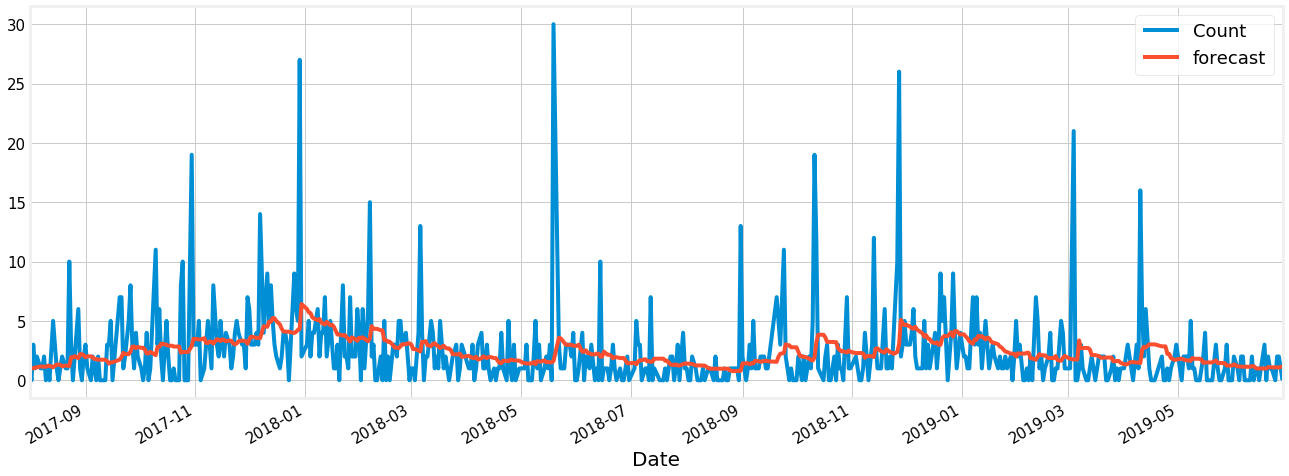

In [529]:
df4 = df3.fillna(method='ffill')
df4.plot('Date', ['Count' , 'forecast'])

In [530]:

df4

,level_0,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,0,2017-08-01,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
1,1,1,2017-08-02,0.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
2,2,2,2017-08-03,3.0,3.0,3.0,2.0,1.000000,1.000000,1.000000
3,3,3,2017-08-04,1.0,4.0,1.0,1.0,1.200000,1.100000,1.090909
4,4,4,2017-08-05,2.0,5.0,2.0,1.0,1.180000,1.090000,1.082569
...,...,...,...,...,...,...,...,...,...,...
564,564,564,2019-06-24,0.0,564.0,1.0,1.0,1.889348,1.735619,1.088573
565,565,565,2019-06-25,2.0,566.0,2.0,2.0,1.800413,1.662057,1.083244
566,566,566,2019-06-26,2.0,567.0,2.0,1.0,1.820372,1.695851,1.073427
567,567,567,2019-06-27,1.0,568.0,1.0,1.0,1.838335,1.626266,1.130402


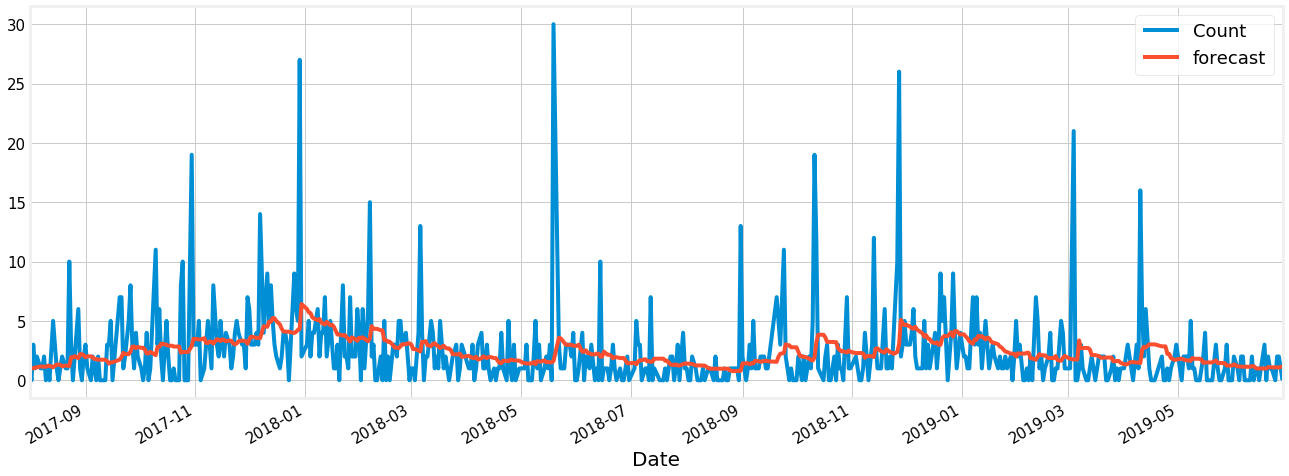

In [531]:

df4.plot('Date', ['Count' , 'forecast'])

In [538]:

df2

,demand_time,q,a,q_est,a_est,forecast,index
0,1,1.0,1.0,1,1,1,0
1,3,3.0,2.0,1,1,1,2
2,4,1.0,1.0,1.2,1.1,1.09091,3
3,5,2.0,1.0,1.18,1.09,1.08257,4
4,6,1.0,1.0,1.262,1.081,1.16744,5
...,...,...,...,...,...,...,...
427,563,1.0,1.0,1.98816,1.81735,1.09399,562
428,564,1.0,1.0,1.88935,1.73562,1.08857,563
429,566,2.0,2.0,1.80041,1.66206,1.08324,565
430,567,2.0,1.0,1.82037,1.69585,1.07343,566


In [723]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt

def regression_model(model, df1, df2, name):
    x = df1[['FinMes','AntesFeriados','DespuesFeriados','AnoNuevo','Navidad','SemanaSanta','FiestasPatrias','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
    y = df1[["Venta"]]
    model.fit(x,y)
    x_test = df2[['FinMes','AntesFeriados','DespuesFeriados','AnoNuevo','Navidad','SemanaSanta','FiestasPatrias','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
    y_test = df2[["Venta"]]
    predictions = model.predict(x_test)
    pred = predictions.ravel()
    return  pred

In [724]:
#import and create date
df= pd.read_csv('datos_de_prueba.csv', sep=';',decimal=',')
df_1 =(df[df["Fecha"] < '2019-06-28 '])
df_2 = (df[df["Fecha"]>= '2019-06-28 '])
df_2 = (df_2[df_2["Fecha"]<='2019-08-31 '])
clf1 = svm.SVR()
clf2 = tree.DecisionTreeRegressor()
clf3 = GaussianNB()
clf4 = LogisticRegression()
clf5 = KNeighborsClassifier()
clf6 = LinearDiscriminantAnalysis()

In [730]:

fit_SVM = regression_model(clf1, df_1, df_2, "SVM")
fit_Decision_Tree = regression_model(clf2, df_1, df_2, "Decision Tree")
fit_GaussianNB = regression_model(clf3, df_1, df_2, "GaussianNB")
fit_Logistic_Regression = regression_model(clf4, df_1, df_2, "Logistic Regression")
fit_KNeighborsClassifier = regression_model(clf5, df_1, df_2, "KNN")
fit_LinearDiscriminantAnalysis = regression_model(clf6, df_1, df_2, "LDA")
results_models = pd.DataFrame({ 'fecha':df_2["Fecha"],
                               'y_test':df_2["Venta"], 
                               'demand_DSS':demand.Fit.values,
                               'fit_SVM':fit_SVM,
                               'fit_Decision_Tree':fit_Decision_Tree,
                               'fit_GaussianNB':fit_GaussianNB,
                               'fit_Logistic_Regression':fit_Logistic_Regression, 
                               'sarima':test_array.pred.values, 
                               'fit_KNeighborsClassifier':fit_KNeighborsClassifier, 
                               'fit_LinearDiscriminantAnalysis':fit_LinearDiscriminantAnalysis })
results_models['fecha']= pd.to_datetime(results_models['fecha']) 
results_models.set_index('fecha', inplace=True)

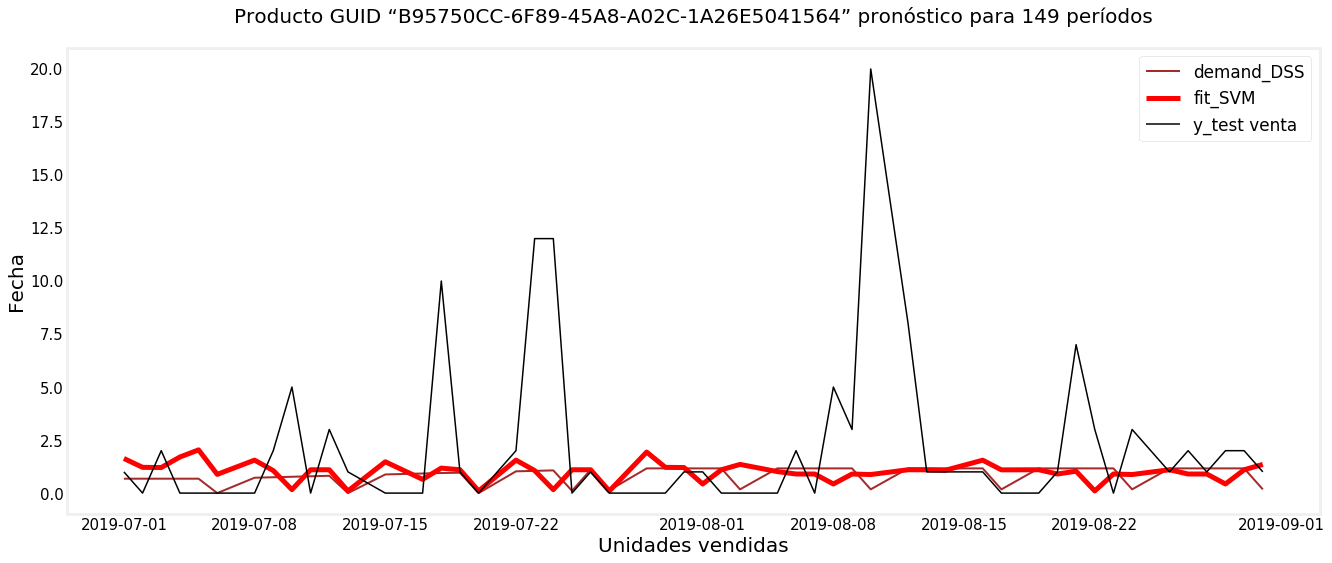

In [747]:
#plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=5.0,color ="red")
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2.0,color ="brown")
plt.plot(  results_models.fit_SVM, label='fit_SVM' ,linewidth=5.0,color ="red")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

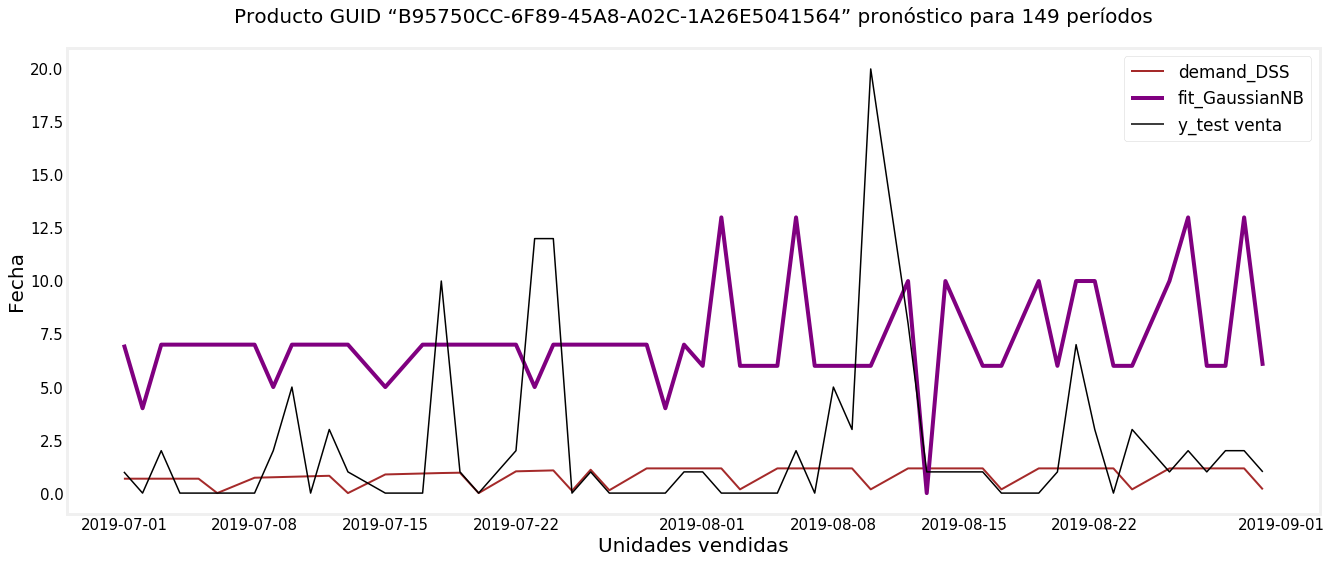

In [748]:
#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot(  results_models.fit_GaussianNB, label='fit_GaussianNB' ,linewidth=4.0,color ="Purple")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

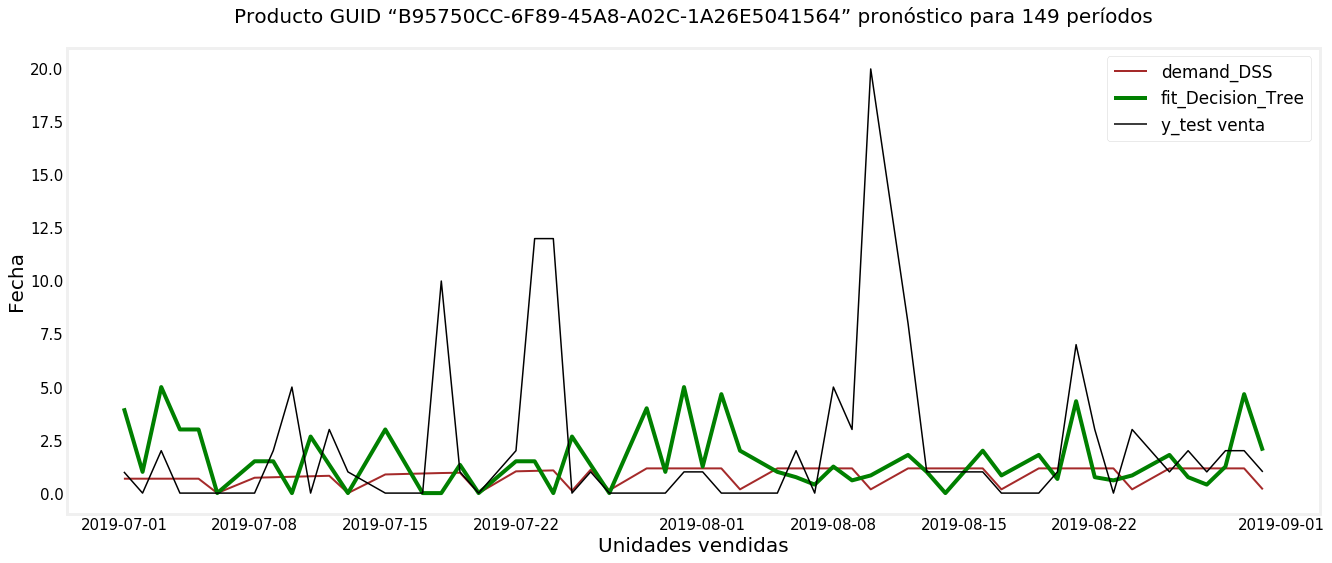

In [749]:

#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot(  results_models.fit_Decision_Tree, label='fit_Decision_Tree' ,linewidth=4.0,color ="green")
plt.plot(test_array.Venta, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show()

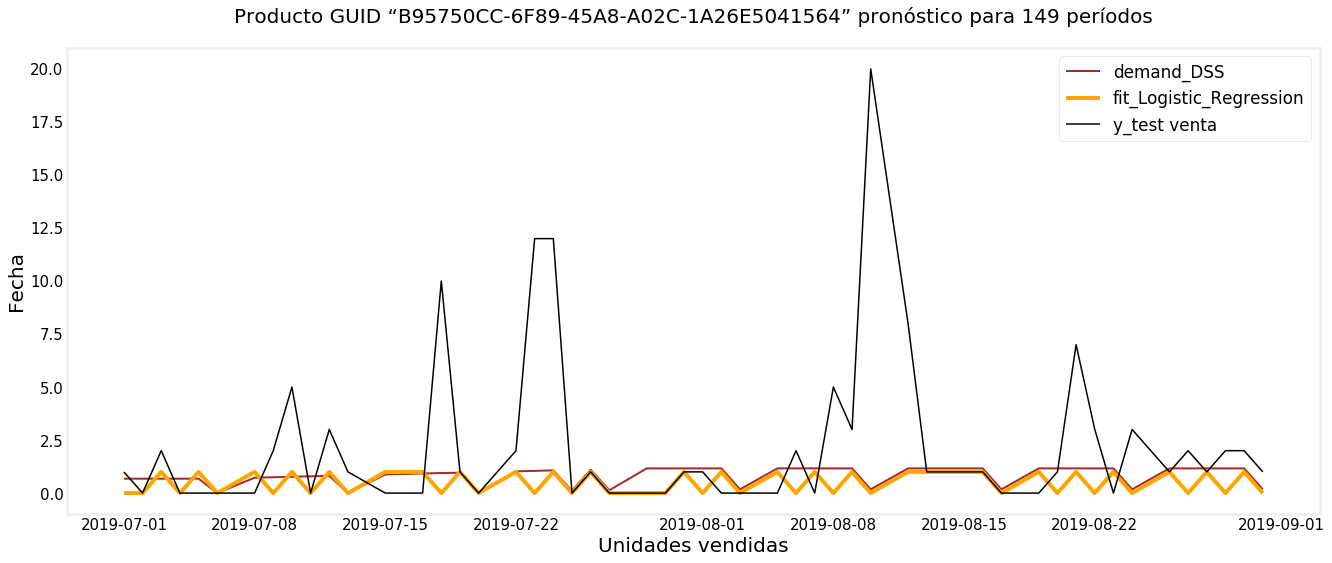

In [750]:

#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot( results_models.fit_Logistic_Regression, label='fit_Logistic_Regression' ,linewidth=4.0,color ="orange")
plt.plot( results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

In [654]:
len(fit_pred2['croston_forecast'])

52

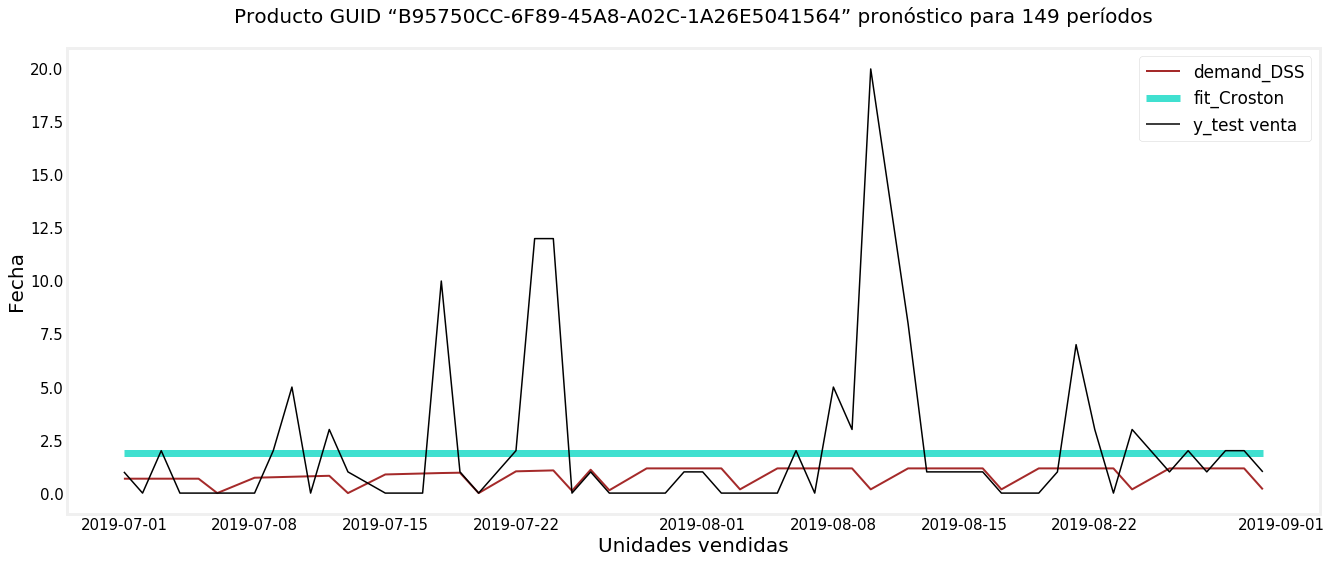

In [751]:
#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=2,color ="brown")
plt.plot( results_models.index , fit_pred2['croston_forecast'], label='fit_Croston' ,linewidth=7.0,color ="turquoise")
plt.plot(results_models.y_test, color ="black", label='y_test venta',linewidth=1.5)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

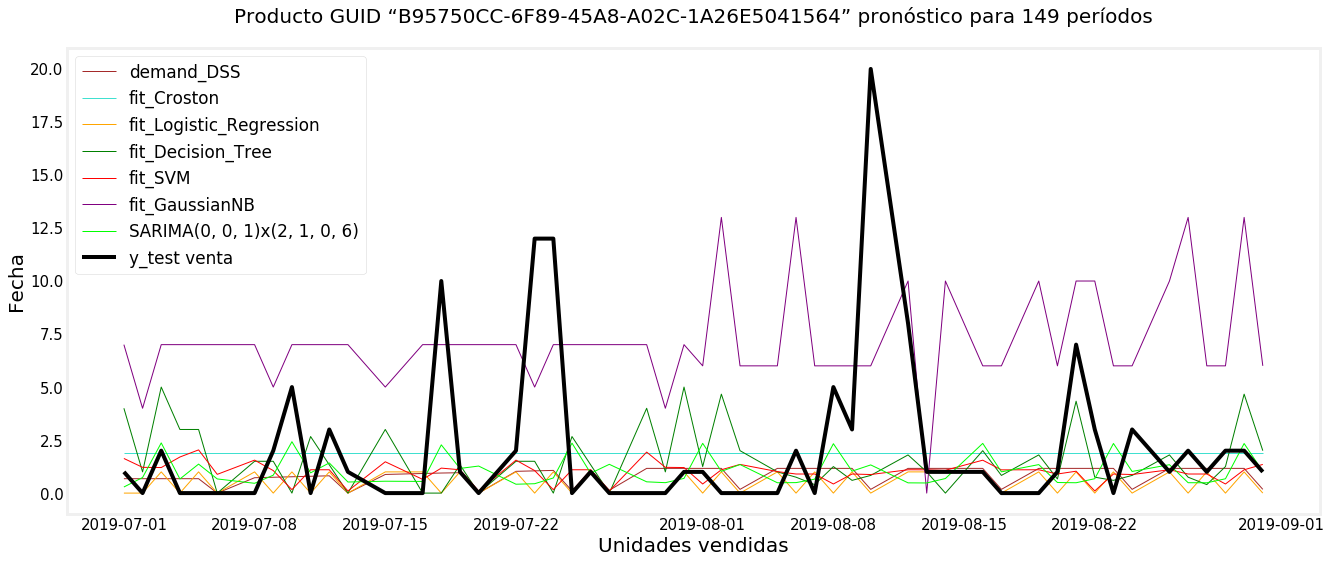

In [754]:
#plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(  results_models.demand_DSS, label='demand_DSS' ,linewidth=1,color ="brown")
plt.plot( results_models.index , fit_pred2['croston_forecast'], label='fit_Croston' ,linewidth=1,color ="turquoise")
plt.plot( results_models.fit_Logistic_Regression, label='fit_Logistic_Regression' ,linewidth=1,color ="orange")
plt.plot(  results_models.fit_Decision_Tree, label='fit_Decision_Tree' ,linewidth=1,color ="green")
plt.plot(  results_models.fit_SVM, label='fit_SVM' ,linewidth=1,color ="red")
plt.plot(  results_models.fit_GaussianNB, label='fit_GaussianNB' ,linewidth=1,color ="Purple")
plt.plot( results_models.sarima, label='SARIMA(0, 0, 1)x(2, 1, 0, 6)' ,linewidth=1,color ="lime")
plt.plot(test_array.Venta, color ="black", label='y_test venta',linewidth=4)
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
plt.rcParams["figure.facecolor"] ='white'
plt.title('Producto GUID “B95750CC-6F89-45A8-A02C-1A26E5041564” pronóstico para 149 períodos')
plt.ylabel('Fecha')
plt.xlabel('Unidades vendidas')
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.show ()

In [789]:
# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [806]:
y_true = results_models.y_test
y_pred = results_models.fit_SVM
mean_squared_error(y_true, y_pred)


17.141166436028715

In [802]:
results_models

,y_test,demand_DSS,fit_SVM,fit_Decision_Tree,fit_GaussianNB,fit_Logistic_Regression,sarima,fit_KNeighborsClassifier,fit_LinearDiscriminantAnalysis
fecha,,,,,,,,,
2019-07-01,1.0,0.679,1.632588,4.000000,7.0,0.0,0.287518,1.0,0.0
2019-07-02,0.0,0.679,1.214571,1.000000,4.0,0.0,0.732887,1.0,0.0
2019-07-03,2.0,0.679,1.204554,5.000000,7.0,1.0,2.366443,0.0,1.0
2019-07-04,0.0,0.679,1.701454,3.000000,7.0,0.0,0.665414,3.0,0.0
2019-07-05,0.0,0.679,2.037050,3.000000,7.0,1.0,1.366443,3.0,0.0
2019-07-06,0.0,0.000,0.883715,0.000000,7.0,0.0,0.667293,0.0,0.0
2019-07-08,0.0,0.725,1.554523,1.500000,7.0,1.0,0.462103,1.0,0.0
2019-07-09,2.0,0.747,1.061821,1.500000,5.0,0.0,0.845536,0.0,0.0
2019-07-10,5.0,0.770,0.162969,0.000000,7.0,1.0,2.422768,0.0,1.0


In [797]:
accurray = pd.DataFrame(columns= ['algorithm','mean absolute error', "mean suqared error" , "r2 score" , "explained variance score"])

In [812]:
mae=[]
mse=[]
evs=[]
r2=[]
algorithm=[]
for i in results_models:
    rows=[]
    if i != "y_test":
        y_true = results_models.y_test
        y_pred = results_models[i]
        #rows.append.mean_absolute_error(y_true, y_pred)
        mae.append(mean_absolute_error(y_true, y_pred))
        mse.append(mean_squared_error(y_true, y_pred))
        evs.append( explained_variance_score(y_true, y_pred))
        r2.append( r2_score(y_true, y_pred))
        algorithm.append(i)
accurray['algorithm']=algorithm       
accurray['mean absolute error']=mae
accurray['mean suqared error']=mse
accurray['explained variance score']=evs
accurray['r2 score']=r2

In [813]:
accurray

,algorithm,mean absolute error,mean suqared error,r2 score,explained variance score
0,demand_DSS,2.014885,16.731567,-0.144444,-0.006984
1,fit_SVM,2.216965,17.141166,-0.172461,-0.062934
2,fit_Decision_Tree,2.585897,18.613814,-0.273190,-0.241431
3,fit_GaussianNB,6.038462,43.884615,-2.001720,-0.369726
4,fit_Logistic_Regression,2.115385,18.269231,-0.249621,-0.035516
5,sarima,2.133354,16.151546,-0.104770,-0.005116
6,fit_KNeighborsClassifier,2.442308,19.711538,-0.348275,-0.182308
7,fit_LinearDiscriminantAnalysis,2.250000,19.826923,-0.356167,-0.173404


LR: 0.247838 (0.060124)
LDA: 0.172368 (0.066054)
KNN: 0.212751 (0.049782)
CART: 0.246178 (0.054545)
NB: 0.036873 (0.044680)
SVM: 0.267168 (0.075281)


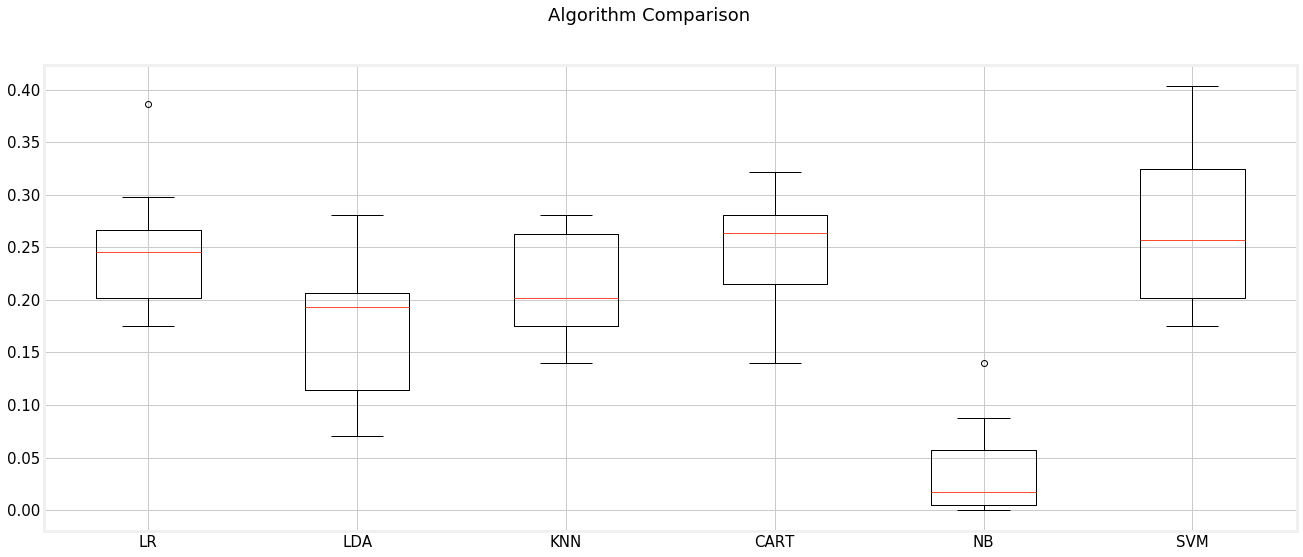

In [479]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
X = df1[['FinMes','AntesFeriados','DespuesFeriados','AnoNuevo','Navidad','SemanaSanta','FiestasPatrias','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
Y = df1[["Venta"]]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [480]:
cv_results

array([0.22807018, 0.1754386 , 0.1754386 , 0.35087719, 0.33333333,
       0.40350877, 0.29824561, 0.19298246, 0.22807018, 0.28571429])

In [481]:
msg

'SVM: 0.267168 (0.075281)'

In [491]:
df

,GUID,Fecha,Venta,FinMes,AntesFeriados,DespuesFeriados,AnoNuevo,Navidad,SemanaSanta,FiestasPatrias,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,B95750CC-6F89-45A8-A02C-1A26E5041564,2017-08-01,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,B95750CC-6F89-45A8-A02C-1A26E5041564,2017-08-02,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,B95750CC-6F89-45A8-A02C-1A26E5041564,2017-08-03,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,B95750CC-6F89-45A8-A02C-1A26E5041564,2017-08-04,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,B95750CC-6F89-45A8-A02C-1A26E5041564,2017-08-05,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,B95750CC-6F89-45A8-A02C-1A26E5041564,2019-12-26,4.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
714,B95750CC-6F89-45A8-A02C-1A26E5041564,2019-12-27,8.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
715,B95750CC-6F89-45A8-A02C-1A26E5041564,2019-12-28,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
716,B95750CC-6F89-45A8-A02C-1A26E5041564,2019-12-30,5.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
